In [54]:
%matplotlib inline
import seaborn as sns
import quandl
from tsmom_model import *
token="Us3wFmXGgAj_1cUtHAAR"

In [58]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [2]:
cleansed=load_amihud_markets_price()

/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:160: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:162: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [3]:
volume=calculate_dollar_volume(cleansed)

/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('./Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:35: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('./volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='sum')
/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:37: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=250,min_periods=100,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='m',how='mean')[:'2016']
/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:37: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mea

In [50]:
contract_size=load_maps()
fx_mkts=contract_size[contract_size.Sector =='Currencies'].index

In [51]:
fx_volume=volume.T.loc[fx_mkts].T.dropna(how='all')

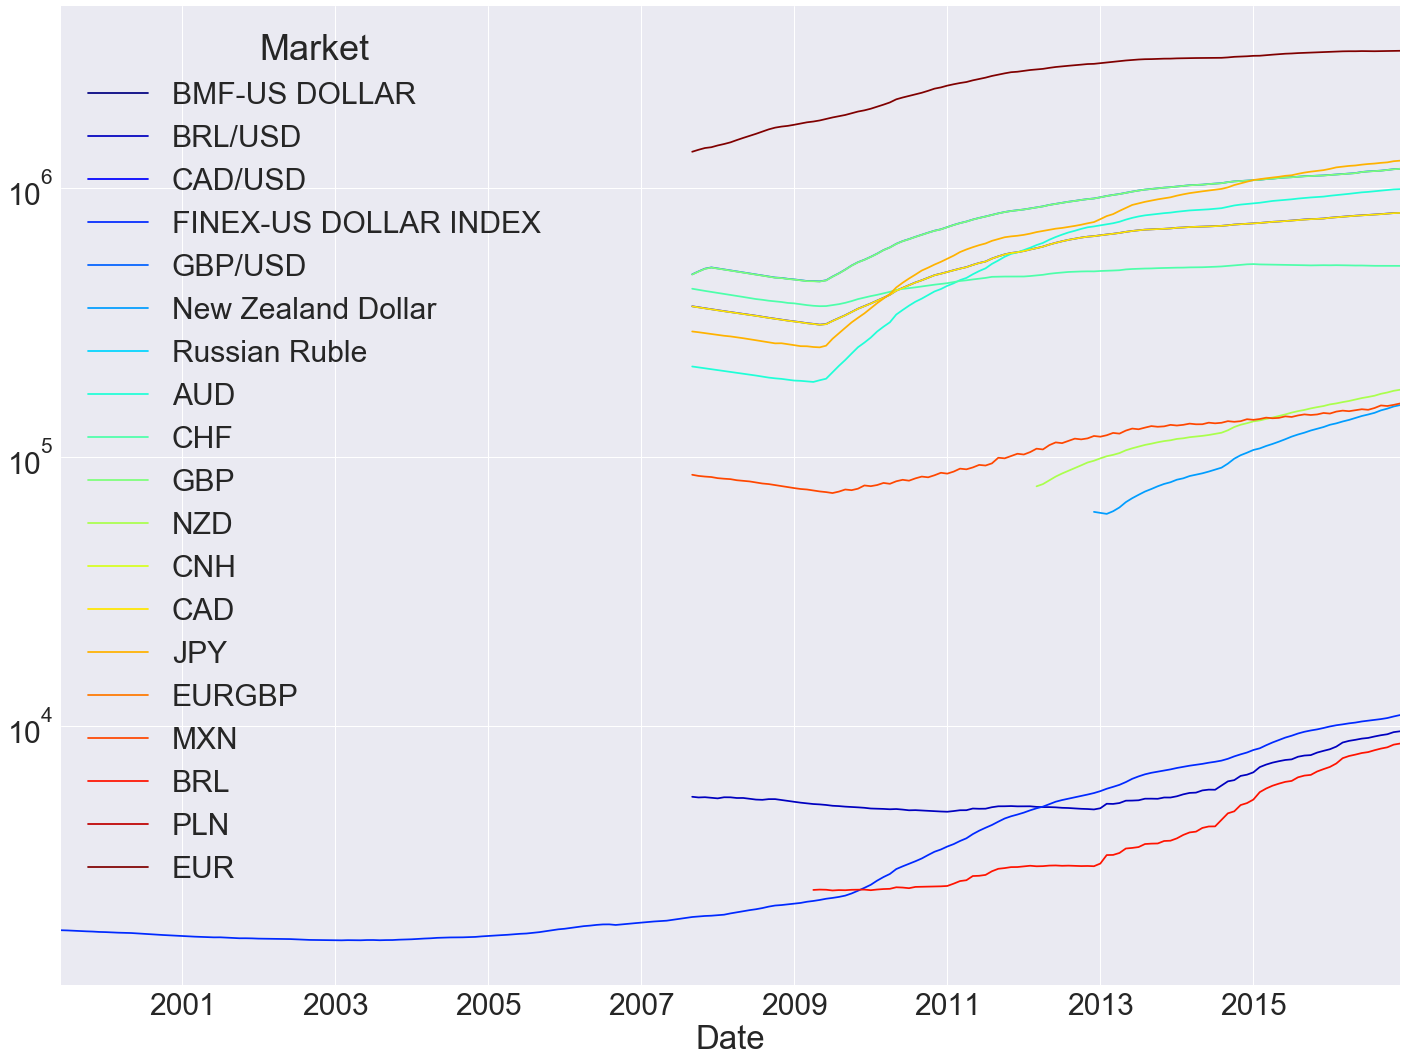

In [52]:
fx_volume.plot(colormap='jet',logy=True)

In [32]:
volume=load_volume()

/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('./Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:35: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('./volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='sum')
/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:37: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=250,min_periods=100,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='m',how='mean')[:'2016']
/Users/mrefermat/git/FinancePhD/LiquidityMomentum/tsmom_model.py:37: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mea

In [53]:
# get British Pound data from quandl

In [56]:
GBP=quandl.get("CHRIS/CME_BP1",authtoken=token)

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  """Entry point for launching an IPython kernel.


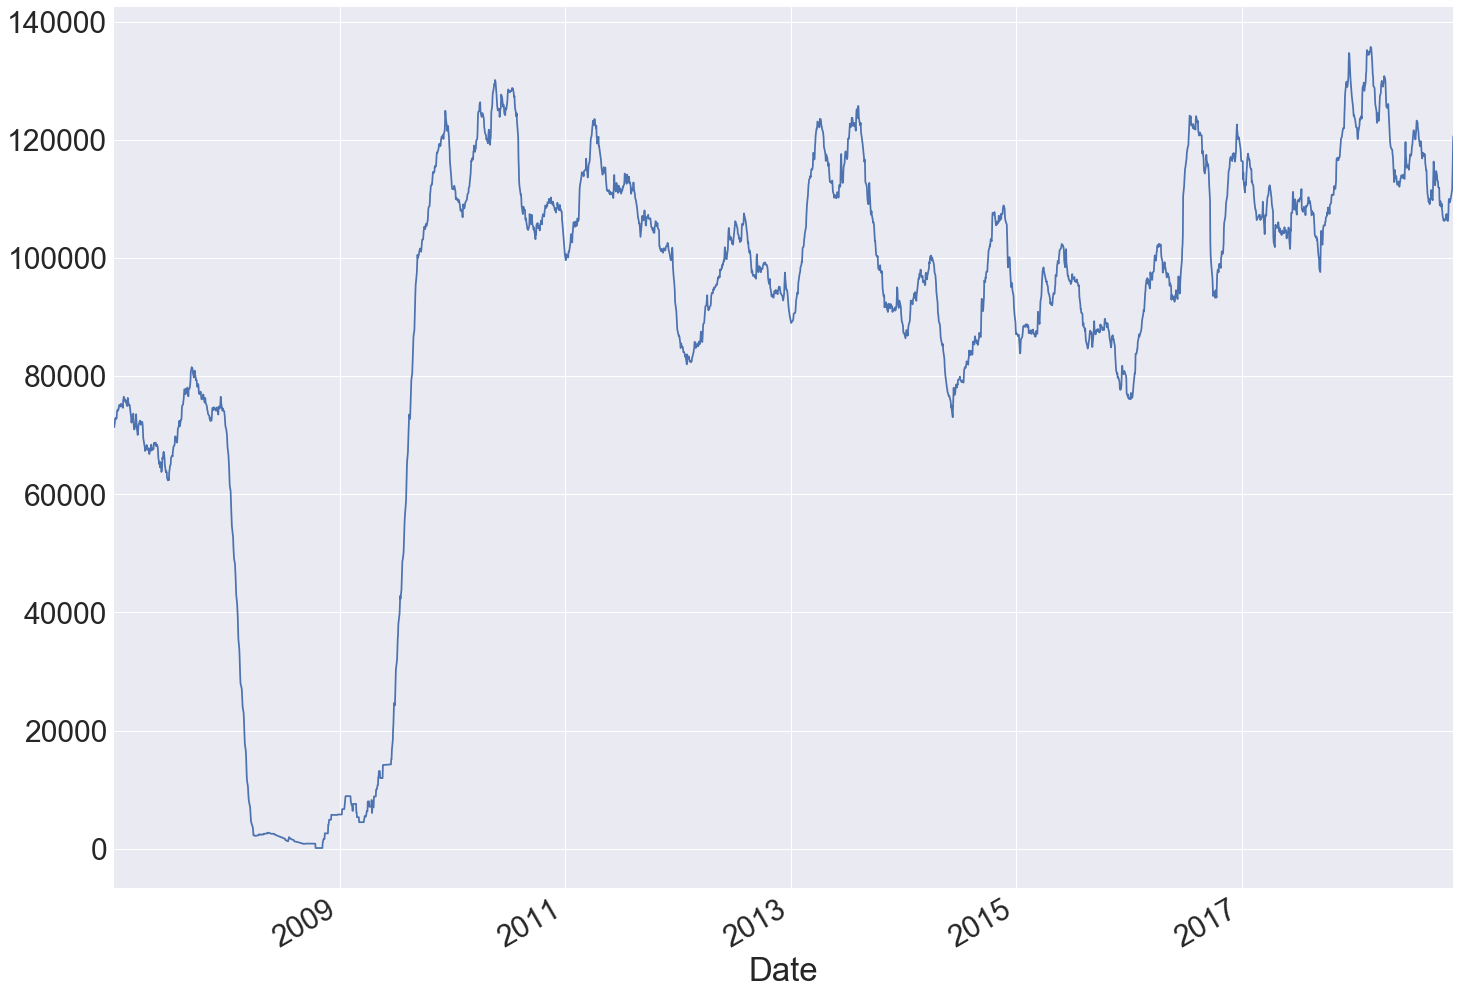

In [65]:
pd.rolling_mean(GBP.Volume,60).dropna()['2007':].plot()

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


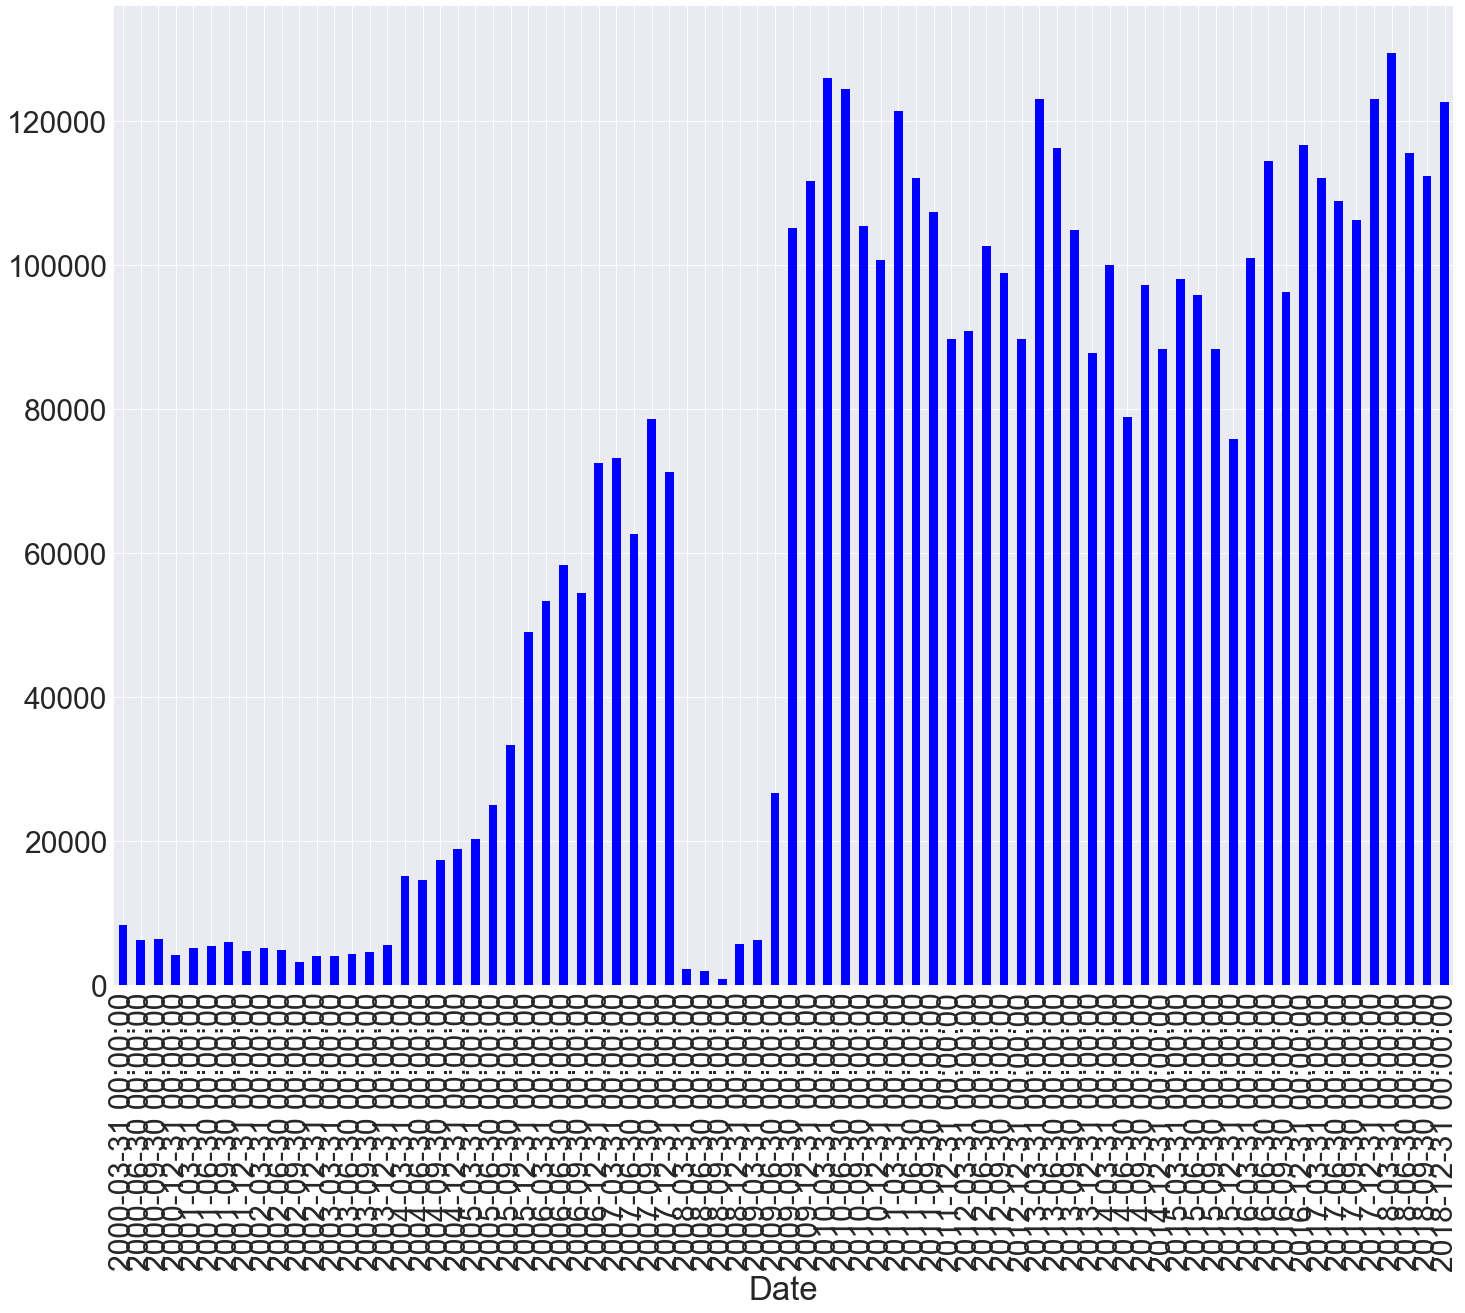

In [72]:
GBP.Volume.resample(rule='q',how='mean')['2000':].plot(kind='bar',colormap='brg')

In [73]:
GBP.Volume.resample(rule='a',how='mean')['2000':].pct_change()

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


Date
2000-12-31          NaN
2001-12-31    -0.161050
2002-12-31    -0.189152
2003-12-31     0.077997
2004-12-31     2.571784
2005-12-31     0.937233
2006-12-31     0.864805
2007-12-31     0.197701
2008-12-31    -0.963151
2009-12-31    22.967798
2010-12-31     0.807303
2011-12-31    -0.055887
2012-12-31    -0.111938
2013-12-31     0.127812
2014-12-31    -0.154766
2015-12-31    -0.018855
2016-12-31     0.198234
2017-12-31     0.051466
2018-12-31     0.061867
Freq: A-DEC, Name: Volume, dtype: float64